In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#let's start by loading our current fighters csv and play around with a linear regression model

current_fighters = pd.read_csv("current_fighters_processed.csv")
current_fighters.head()

,Unnamed: 0,full_nm,nickname,ht,wt,reach,w,l,d,belt,...,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,Shamil Abdurakhimov,Abrek,75,235,76,20,8,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,Mariya Agapova,Demonslayer,66,125,68,10,4,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,Kevin Aguilar,Angel of Death,67,155,73,17,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Amir Albazi,The Prince,65,125,68,17,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,Irene Aldana,NaN,69,135,68,14,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#then, let's normalize all of our numeric data

In [4]:
from sklearn import preprocessing

num_cols = ['ht', 'wt', 'reach', 'w', 'l', 'd',
       'belt','age_in_2023', 'sig_str_pm', 'str_acc_percentage',
       'str_abs_pm', 'str_def_percentage', 'td_avg_15m', 'td_acc_percentage',
       'td_def_percentage', 'sub_avg_15m', 'win_percentage']

for col in num_cols:
    current_fighters[[col]] = preprocessing.scale(current_fighters[[col]].astype(float))

In [5]:
current_fighters.describe()

,Unnamed: 0,ht,wt,reach,w,l,d,belt,age_in_2023,sig_str_pm,...,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
count,430.000000,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,216.939535,-6.723304e-16,-3.658572e-16,3.547550e-16,1.179935e-16,-1.858978e-17,-2.272084e-17,5.447839e-17,2.840105e-17,1.094732e-16,...,0.083721,0.072093,0.069767,0.146512,0.127907,0.018605,0.041860,0.009302,0.079070,0.067442
std,125.067836,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,1.001165e+00,...,0.277291,0.258943,0.255051,0.354030,0.334375,0.135281,0.200504,0.096111,0.270162,0.251078
min,0.000000,-2.518854e+00,-1.170402e+00,-2.856590e+00,-1.853862e+00,-1.559816e+00,-3.807498e-01,-2.028848e-01,-2.099480e+00,-2.258282e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.250000,-6.234163e-01,-6.099019e-01,-6.666566e-01,-6.463040e-01,-6.260978e-01,-3.807498e-01,-2.028848e-01,-7.898432e-01,-7.468957e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,217.500000,-8.186275e-02,-3.296521e-01,-9.676451e-03,-1.287794e-01,-3.619062e-03,-3.807498e-01,-2.028848e-01,-3.532975e-01,-9.190095e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,324.750000,7.304676e-01,7.913474e-01,6.473037e-01,5.612535e-01,6.188596e-01,-3.807498e-01,-2.028848e-01,5.197940e-01,5.703513e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,432.000000,2.625905e+00,3.033346e+00,2.837237e+00,4.183926e+00,4.353732e+00,4.297034e+00,4.928906e+00,4.448706e+00,4.034021e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#and now we can build our model with sklearn!
#let's start with a kitchen sink regression
#First, we'll drop all non-numeric data from our x-axis, as well as the data we want for our y-axis

from sklearn.model_selection import train_test_split as tts

drop = ['Unnamed: 0', 'full_nm', 'nickname','country', 'win_percentage']

X = current_fighters.drop(drop, axis=1)
Y = current_fighters['win_percentage']

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.2)

In [7]:
x_train.shape, x_test.shape

((344, 32), (86, 32))

In [8]:
y_train.shape, y_test.shape

((344,), (86,))

In [9]:
from sklearn.linear_model import LinearRegression as LR

linear_model = LR(fit_intercept=False).fit(x_train, y_train)

In [10]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.8965596722299866


In [11]:
y_pred = linear_model.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.8686497265572019


In [13]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
320,1.406024,1.184525
4,-0.769837,-0.829773
75,0.117721,-0.002472
367,-0.782681,-0.995233
345,0.183755,0.223156
396,0.125181,-0.002472
132,0.206340,-0.133098
339,0.715559,1.486670
255,0.581654,0.952106
181,-0.612207,-0.575219


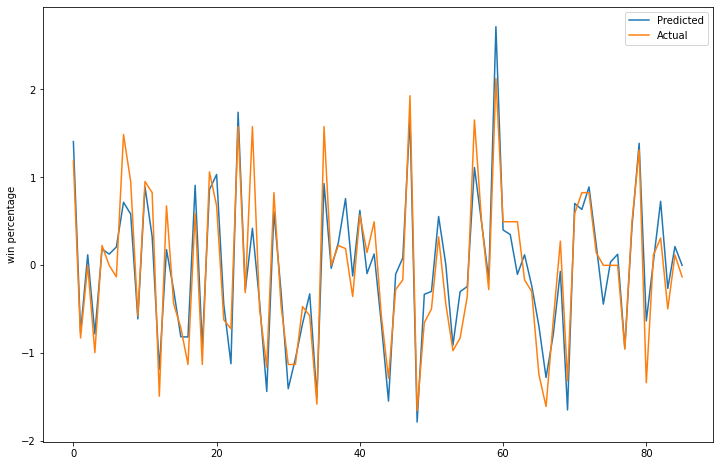

In [14]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('win percentage')

plt.legend()
plt.show()

In [16]:
#so we can see that the model is generally pretty good. It does vary between weight classes, however
#our next step is going to be exploring lasso, ridge, and elastic net models to see if they can help w the overfitting

Training score:  0.8905756188264149
Test score:  0.8954766505094849


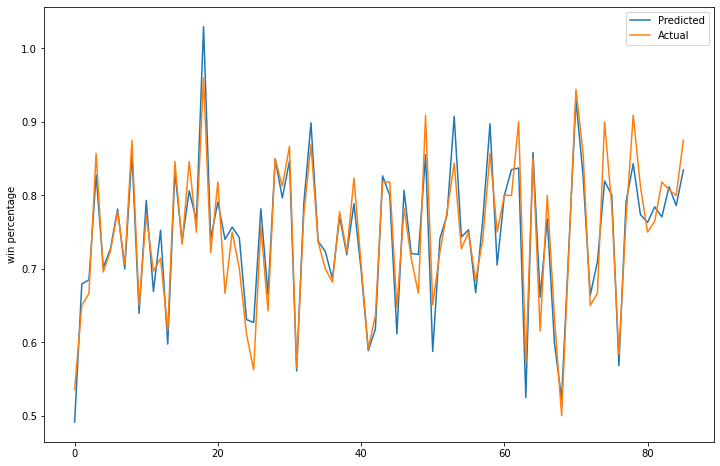

In [76]:
from sklearn.linear_model import Ridge

X = current_fighters[['ht', 'wt','reach', 'w', 'l', 'd','belt', 'sig_str_pm', 'str_acc_percentage',
                                                        'str_abs_pm', 'str_def_percentage', 
                                                        'td_def_percentage', 'sub_avg_15m','Bantamweight', 'Catch Weight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', "Women's Bantamweight",
       "Women's Featherweight", "Women's Flyweight", "Women's Strawweight"]]
Y = current_fighters['win_percentage']

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.2)

x_train.shape, x_test.shape
y_train.shape, y_test.shape

ridge = Ridge().fit(x_train, y_train)
    
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
    
print("Training score: ", r2_score(y_train, y_train_pred))
print("Test score: ", r2_score(y_test, y_test_pred))
    

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('win percentage')
plt.legend()
plt.show()

In [44]:
#wow what a difference!
#our model for predicting a fighter's win percentage has a consistant nearly-90% accuracy
#a linear model probably won't be best for predicting fight outcomes, but we can use this information 
#to hypothesize what features will be most important